<Figure size 1500x600 with 0 Axes>

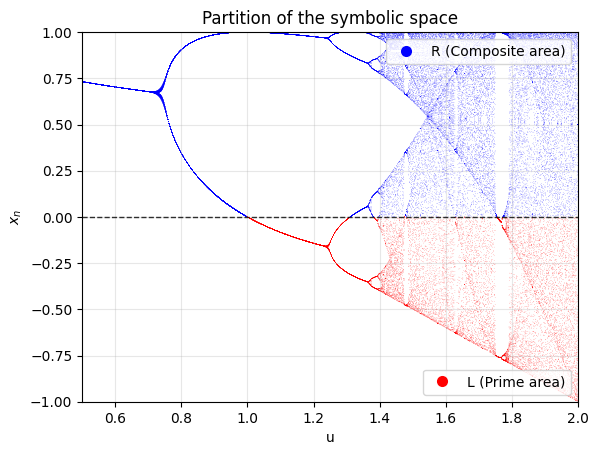

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic mapping: x_{n+1} = 1 - u * x_n^2
def logistic_map(x, u):
    return 1 - u * x**2

# 参数设置
u_min = 0.5
u_max = 2.0
u_steps = 1000
x_init = 0.5  # 初始值
transient = 100  # 烧掉前100个点以达到稳定状态
num_points = 100  # 每个u记录的点数

# 生成u值
u_values = np.linspace(u_min, u_max, u_steps)

# 存储结果
x_data = []
u_data = []

# 生成分岔图数据（左图）
for u in u_values:
    x = x_init
    for _ in range(transient):
        x = logistic_map(x, u)
    for _ in range(num_points):
        x = logistic_map(x, u)
        x_data.append(x)
        u_data.append(u)

# 绘制左图：全范围分岔图
plt.figure(figsize=(15, 6))

# 分离正负值
positive_x = [x for x, u in zip(x_data, u_data) if x > 0]
negative_x = [x for x, u in zip(x_data, u_data) if x <= 0]
positive_u = [u for x, u in zip(x_data, u_data) if x > 0]
negative_u = [u for x, u in zip(x_data, u_data) if x <= 0]

import matplotlib.pyplot as plt

# 假设negative_u, negative_x, positive_u, positive_x, u_min, u_max已经定义
# 绘制散点图
fig, ax = plt.subplots()
ax.scatter(positive_u, positive_x, s=0.1, c='blue', edgecolors='none', label='R')
ax.scatter(negative_u, negative_x, s=0.1, c='red', edgecolors='none', label='L')

# 添加轴标签和标题
ax.set_xlabel('u')
ax.set_ylabel('$x_n$')
ax.set_title('Partition of the symbolic space')
ax.set_xlim(u_min, u_max)
ax.set_ylim(-1, 1)
ax.grid(True, alpha=0.3)

# 创建两个独立的图例
from matplotlib.lines import Line2D

#画一个横线
ax.axhline(y=0, color='black', linestyle='--', linewidth=1.0, alpha=0.8)

# 自定义Positive图例项
positive_legend = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='R (Composite area)', markeredgecolor='none')
# 自定义Negative图例项
negative_legend = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='L (Prime area)', markeredgecolor='none')


# 分别添加两个图例到指定位置
first_legend = plt.legend(handles=[positive_legend], loc='upper right')
ax.add_artist(first_legend) # 这一步很重要，不然第一个图例会被第二个覆盖
plt.legend(handles=[negative_legend], loc='lower right')

plt.show()